![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [35]:
print("Análisis descriptivo para variable workingday:")
display(bikes['workingday'].describe())
display(bikes['workingday'].value_counts())
print("Inferencias para variable workingday:\n")
print("""La variable es categórica y está representada como 1 cuando no es fin de semana ni feriado.

Se observa que existen 7412 registros con 'workingday'=1 , que corresponden al 68% del total de dataset. Las observaciones 
restantes son 3474 y corresponden a 'workingday'=0. 

A pesar de que existe una mayor cantidad de registros como 'workingday'=1, podemos observar que el promedio de la columna 
total, es decir, la cantidad de alquileres de bicicletas es similar entre un día laboral y día no laboral.  0-> 188 ; 1->193

Lo anterior parece indicar que en los días no laborales el alquiler de bicicletas se mantiene activo.
""")

Análisis descriptivo para variable workingday:


count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

1    7412
0    3474
Name: workingday, dtype: int64

Inferencias para variable workingday:

La variable es categórica y está representada como 1 cuando no es fin de semana ni feriado.

Se observa que existen 7412 registros con 'workingday'=1 , que corresponden al 68% del total de dataset. Las observaciones 
restantes son 3474 y corresponden a 'workingday'=0. 

A pesar de que existe una mayor cantidad de registros como 'workingday'=1, podemos observar que el promedio de la columna 
total, es decir, la cantidad de alquileres de bicicletas es similar entre un día laboral y día no laboral.  0-> 188 ; 1->193

Lo anterior parece indicar que en los días no laborales el alquiler de bicicletas se mantiene activo.



In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [47]:
print("Análisis descriptivo para variable hour:")
display(bikes['hour'].describe())
display(bikes['hour'].value_counts())
print("Inferencias para variable hour:\n")
print("""La variable es discreta y está representada por las 24 del día. Se observa que a las 3am existen 433 registros, menos que el 
promedio de registros en las diferentes horas que es aproximadamente 455.

Lo mas interesante se observa cuando se agrupa por hora y se obtiene el promedio de alquiler de bicicletas, en donde se 
presenta un incremento notable en la franja desde las 16horas hasta las 19horas, y a las 8horas en donde se supera el umbral de 300 alquileres por hora. 

Lo anterior parece lógico entendiendo las horas pico que ocurren en los medios de transporte.
""")


Análisis descriptivo para variable hour:


count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

23    456
20    456
16    456
15    456
17    456
22    456
14    456
18    456
21    456
19    456
13    456
12    456
7     455
6     455
0     455
8     455
11    455
10    455
9     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

Inferencias para variable hour:

La variable es discreta y está representada por las 24 del día. Se observa que a las 3am existen 433 registros, menos que el 
promedio de registros en las diferentes horas que es aproximadamente 455.

Lo mas interesante se observa cuando se agrupa por hora y se obtiene el promedio de alquiler de bicicletas, en donde se 
presenta un incremento notable en la franja desde las 16horas hasta las 19horas, y a las 8horas en donde se supera el umbral de 300 alquileres por hora. 

Lo anterior parece lógico entendiendo las horas pico que ocurren en los medios de transporte.



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

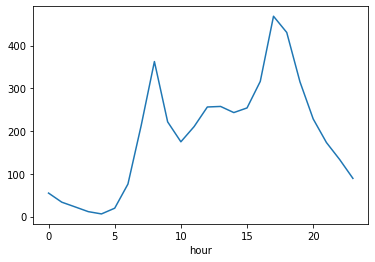

In [48]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

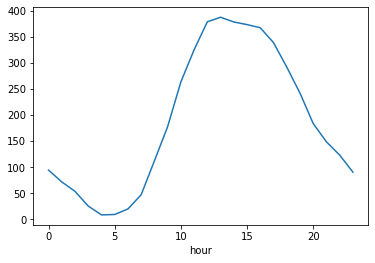

In [57]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
wd_cero=bikes.query("workingday==0")
wd_cero.head()
wd_cero.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

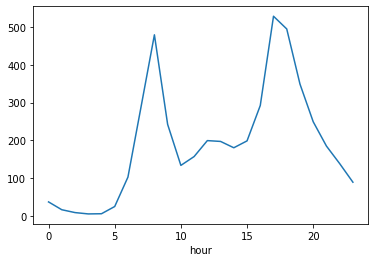

In [58]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
wd_uno=bikes.query("workingday==1")
wd_uno.head()
wd_uno.groupby('hour').total.mean().plot()

In [73]:
print("""Hallazgos:
Las gráficas anteriores son muy interesantes ya que nos pueden dar algunas pistas del fenómeno que estamos analizando. 
En la primera grafica se observa el patrón de la cantidad de alquileres según la hora del día, y allí se aprecia una 
estacionalidad propia de las series temporales, en donde tenemos picos y valles que nos dan una idea de como varía el alquiler en relación con la hora del día.

Sin embargo, al disgregar el dataset por la variable workingday se observa una notable diferencia en el patrón de 
comportamiento de alquileres en días laborales vs días no laborales. 

En la segunda grafica se presenta el patrón de días no laborales, el cual está marcado casi por una campana que tiene su máximo sobre el medio día y se presenta una ventana de tiempo de casi 6 horas con más de 300 alquileres. Por otra parte, existe un 
valle que ocurre en horas de la madrugada. 

En la tercera grafica se presenta el patrón de días laborales, el cual este marcado por dos picos uno en la mañana sobre las 
8am y otro al finalizar la tarde entre las 17h y 18h. El valle que se presenta entre estas dos horas presenta un notable 
descenso. Por otra parte, existe un segundo valle que ocurre en horas de la madrugada.

Analizando las tres graficas se puede decir que analizar el patrón del comportamiento con disgregación por día laboral, es muy valioso ya que permite entender como cambia el uso que se le podría dar a la bicicleta, de igual forma en términos de 
predicción se puede decir que las dos variables: Hora y Workingday pueden ser valiosas para la explicación de la variable
dependiente.

En términos de negocio estos patrones podrían ser importantes para la planeación de disponibilidad de bicicletas, planes de 
mercadeo en horas valle, evitar una sobreoferta de bicicletas en horas valle durante la semana y ajustar los horarios de 
entregas de bicicletas, ya que en el fin de semana la actividad de alquiler parece iniciar más tarde que entre semana. Queda la pregunta abierta sobre el uso que se le dan a las bicicletas, si es para ir a trabajar o dar un paseo, entre otras.

""")

Hallazgos:
Las gráficas anteriores son muy interesantes ya que nos pueden dar algunas pistas del fenómeno que estamos analizando. 
En la primera grafica se observa el patrón de la cantidad de alquileres según la hora del día, y allí se aprecia una 
estacionalidad propia de las series temporales, en donde tenemos picos y valles que nos dan una idea de como varía el alquiler en relación con la hora del día.

Sin embargo, al disgregar el dataset por la variable workingday se observa una notable diferencia en el patrón de 
comportamiento de alquileres en días laborales vs días no laborales. 

En la segunda grafica se presenta el patrón de días no laborales, el cual está marcado casi por una campana que tiene su máximo sobre el medio día y se presenta una ventana de tiempo de casi 6 horas con más de 300 alquileres. Por otra parte, existe un 
valle que ocurre en horas de la madrugada. 

En la tercera grafica se presenta el patrón de días laborales, el cual este marcado por dos picos uno en l

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [130]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X2var=bikes[['hour','workingday']]
X2var.head()
Y=bikes[['total']]
Y.head()

XTrain, XTest, yTrain, yTest = train_test_split(X2var,Y,test_size=0.30,random_state=0)
LReg =LinearRegression()
LReg.fit(XTrain,yTrain)
print("Coeficientes: hour , workingday")
display(LReg.coef_)
print("Intercepto:")
display(LReg.intercept_ )
print("R2")
display(LReg.score(X2var,Y))


predicciones = LReg.predict(X = XTest)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = yTest,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

print("""El coeficiente de la variable hour es 10.52 y el de workingday es 5.9. Al apreciar que los dos coeficientes son positivos 
se observa que el modelo tiene limitaciones para predecir las disminuciones en los patrones observados anteriormente""")

Coeficientes: hour , workingday


array([[10.52404937,  5.97715592]])

Intercepto:


array([64.78367474])

R2


0.1605175005328403

[[291.76586736]
 [239.14562053]
 [239.14562053]]

El error (rmse) de test es: 165.48176792747424
El coeficiente de la variable hour es 10.52 y el de workingday es 5.9. Al apreciar que los dos coeficientes son positivos 
se observa que el modelo tiene limitaciones para predecir las disminuciones en los patrones observados anteriormente


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [131]:
# Celda 4

X=XTrain
y=yTrain

# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001



In [222]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
       #mse
    
    return best_split

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

El error (rmse) de test es: 140.59762537017076


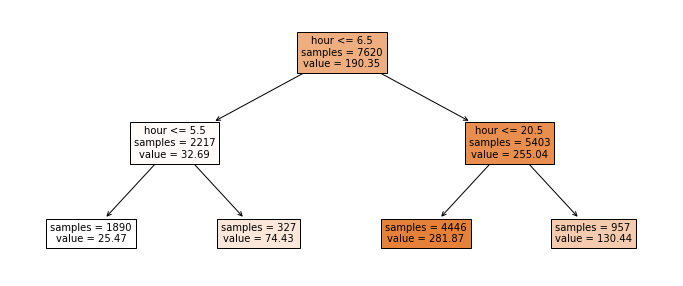

In [188]:
# Celda 5

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#XTrain, XTest, yTrain, yTest 

modelo = DecisionTreeRegressor( max_depth= 2, random_state = 5)

# Entrenamiento del modelo
modelo.fit(XTrain, yTrain)
fig, ax = plt.subplots(figsize=(12, 5))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = XTrain.columns,
            class_names   = 'total',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

predicciones = modelo.predict(X = XTest)

rmse = mean_squared_error(
        y_true  = yTest,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [200]:
param_grid = {"max_depth": [2, 6, 8, 10, 15, 25 , 40],
              "min_samples_leaf": [10,20, 40, 100],
              "max_leaf_nodes": [5, 20, 100,150],
              }


grid_cvtun = GridSearchCV(modelo, param_grid, cv=5)

grid_cvtun.fit(X,y)
print("R2 =  {}".format(grid_cvtun.best_score_))
print("mejores parametros \n{}".format(grid_cvtun.best_params_))

R2 =  0.6500373540881188
mejores parametros 
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 10}


In [202]:
modelo_tun= DecisionTreeRegressor( max_depth= 8, max_leaf_nodes=100,min_samples_leaf=10, random_state = 5)
modelo_tun.fit(XTrain, yTrain)
predicciones = modelo_tun.predict(X = XTest)

rmse = mean_squared_error(
        y_true  = yTest,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 106.29709227723208


In [221]:
print("""Para el punto 3 con un modelo de regresion lineal multiple se obtuvo un RMSE= 165.48

Para el arbol con profundidad=2 se obtiene un valor de RMSE=140.59  

Para el arbol calibrado mediante el GRIDSearch con tres parametros: max_depth,min_samples_leaf,max_leaf_nodes  se obtiene un 
mejor resultado que en los modelos anteriores, un RMSE=106.29 

Como este último es un valor de error menor se considera que el modelo calibrado de arbol de regresion puede predecir mejor que el modelo sin calibrar y que la regresion lineal, para este caso en particular.""")

Para el punto 3 con un modelo de regresion lineal multiple se obtuvo un RMSE= 165.48

Para el arbol con profundidad=2 se obtiene un valor de RMSE=140.59  

Para el arbol calibrado mediante el GRIDSearch con tres parametros: max_depth,min_samples_leaf,max_leaf_nodes  se obtiene un 
mejor resultado que en los modelos anteriores, un RMSE=106.29 

Como este último es un valor de error menor se considera que el modelo calibrado de arbol de regresion puede predecir mejor que el modelo sin calibrar y que la regresion lineal, para este caso en particular.


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [223]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [227]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()


0.5

In [228]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9